# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [15]:
citi

['port keats',
 'grand gaube',
 'douglas',
 'new norfolk',
 'karaul',
 'skagastrond',
 'cabo san lucas',
 'east london',
 'nikolskoye',
 'punta arenas',
 'hermanus',
 'tasiilaq',
 'bluff',
 'saint george',
 'thompson',
 'bajo baudo',
 'petropavlovsk-kamchatskiy',
 'ust-kulom',
 'katsuura',
 'kruisfontein',
 'ushuaia',
 'yellowknife',
 'kapaa',
 'marcona',
 'haveri',
 'busselton',
 'suao',
 'esperance',
 'tsihombe',
 'itapemirim',
 'tocopilla',
 'illoqqortoormiut',
 'lere',
 'san quintin',
 'korla',
 'luderitz',
 'mar del plata',
 'nantucket',
 'gander',
 'turinsk',
 'tuy hoa',
 'taolanaro',
 'moose factory',
 'rosarito',
 'kaitangata',
 'neiafu',
 'bethel',
 'adre',
 'hobart',
 'pevek',
 'qaanaaq',
 'upernavik',
 'geraldton',
 'biak',
 'bobcaygeon',
 'oreanda',
 'albany',
 'butaritari',
 'arraial do cabo',
 'salalah',
 'margate',
 'rikitea',
 'bereda',
 'dien bien',
 'san patricio',
 'ahipara',
 'sao sepe',
 'barentsburg',
 'bella union',
 'icod de los vinos',
 'saskylakh',
 'urengoy',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [22]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e959504f42c2d34ccc670ae373039d68&units=imperial&q='

In [27]:
# Performing a weather check on city using a series of API calls:

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1

for city in cities:
    
     # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
     # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

        
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        pass
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City processed: cape town
City processed: lebu
City processed: zhigansk
City processed: new norfolk
City processed: kapaa
City processed: hermanus
City processed: necochea
City processed: shimoda
City processed: key west
City processed: atuona
City processed: vaini
City processed: avarua
City processed: hithadhoo
City processed: kaitangata
City processed: port alfred
City processed: hasaki
City processed: lorengau
City processed: samarai
City NOT found: nizhneyansk
City processed: mirnyy
City processed: hudson
City processed: ixtapa
City NOT found: samusu
City processed: ushuaia
City processed: basavakalyan
City processed: sao joao da barra
City processed: katsuura
City processed: yellowknife
City processed: punta arenas
City processed: novyye lyady
City processed: stromness
City processed: mataura
City processed: padang
City processed: manzanillo
City processed: hobart
City processed: hambantota
City NOT found: tabiauea
City processed: egvekinot
City processed: nanzhang
City processed

City processed: sibuco
City processed: auki
City processed: vostok
City processed: vestmannaeyjar
City processed: mondlo
City processed: hella
City processed: kepno
City processed: kulu
City processed: whitianga
City processed: hokitika
City processed: esperance
City processed: neryungri
City NOT found: rungata
City processed: vardo
City processed: chihuahua
City processed: bambous virieux
City processed: longyearbyen
City processed: oranjestad
City processed: klaksvik
City processed: itapuranga
City processed: livny
City processed: esil
City processed: moerai
City processed: karratha
City processed: inhambane
City processed: biak
City processed: lata
City processed: charagua
City NOT found: bolungarvik
City processed: faanui
City processed: lang suan
City processed: sur
City processed: evensk
City NOT found: yuzhno-yeniseyskiy
City NOT found: zolotinka
City processed: salinas
City processed: bandarbeyla
City processed: mogocha
City processed: muyezerskiy
City processed: mogadishu
City

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": foundCities, 
    "Lat": lat, 
    "Lng": lon, 
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed": windSpeed,
     "Country": country,
     "Date": date
})

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shubarshi,-33.9258,18.4232,73.90,65,0,19.57,ZA,1669736915
1,shubarshi,-37.6167,-73.6500,61.86,76,89,14.50,CL,1669737086
2,shubarshi,66.7697,123.3711,-41.82,99,44,2.93,RU,1669737086
3,shubarshi,-42.7826,147.0587,53.10,63,100,3.80,AU,1669737086
4,shubarshi,22.0752,-159.3190,69.12,98,99,1.01,US,1669737087


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

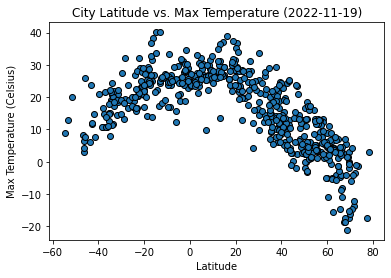

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-11-19)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

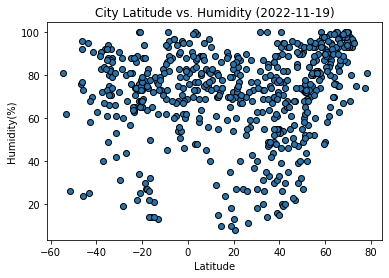

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-11-19)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

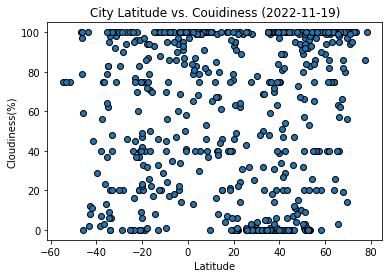

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Couidiness (2022-11-19)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

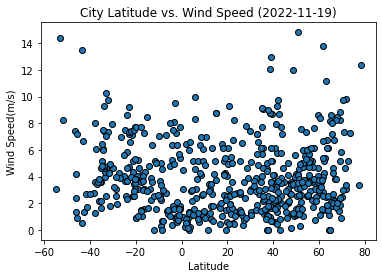

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-11-19)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434125


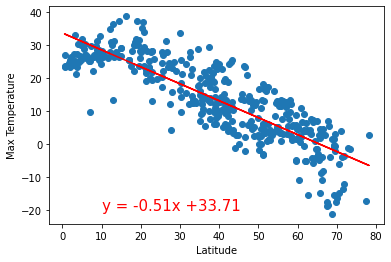

In [58]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

The r-value is: 0.4121057168607252


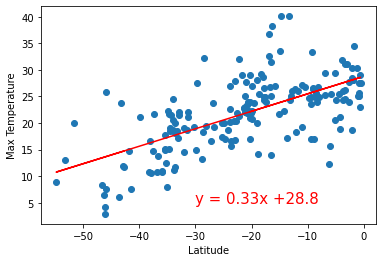

In [69]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** 


In the northwern hemisphere, there is a negative relationship with the temperature and latitude, which means the higher the latitude, the lower the temperature.

In the southern hemisphere, there is a positive relationship with the temperature and latitude, which means the higher the latitude, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


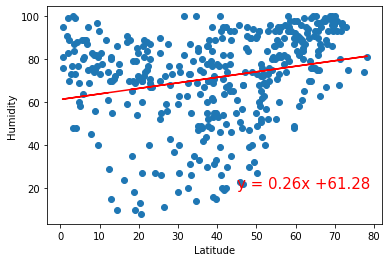

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

The r-value is: 0.0002808747046324618


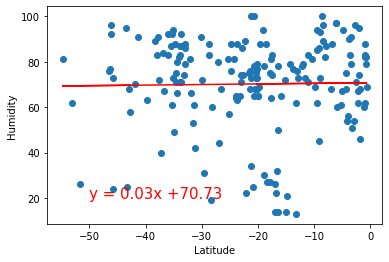

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")



# Show plot
plt.show()

**Discussion about the linear relationship:** 


In the northwern hemisphere, there is a weak posiitve relationship with the temperature and latitude, which means the higher the latitude, the higher the humidity.

In the southern hemisphere, there is a weak positive relationship with the temperature and latitude, which means the higher the latitude, the higher the humidity.

From the analysis, the latitude has overall less impact on the humidity since both of the r-value is very close tot zero.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811043


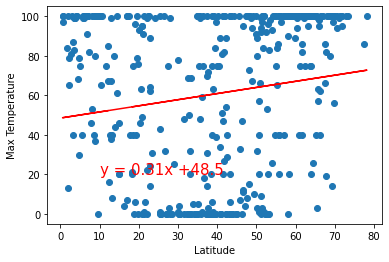

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

The r-value is: 0.020567354299943663


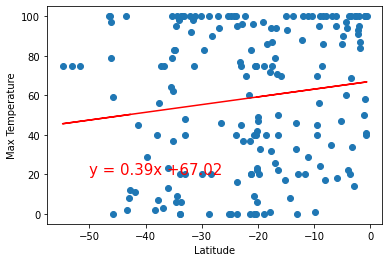

In [61]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** 

In the northwern hemisphere, there is a positive relationship with the cloudiness and latitude, which means the higher the latitude, the higher the cloudiness.

In the southern hemisphere, there is a positive relationship with the cloudiness and latitude, which means the higher the latitude, the higher the cloudiness.

From the analysis, the latitude has overall less impact on the cloudiness since both of the r-value is very close tot zero an the dots in the scatter plots spread out very evenly in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449484


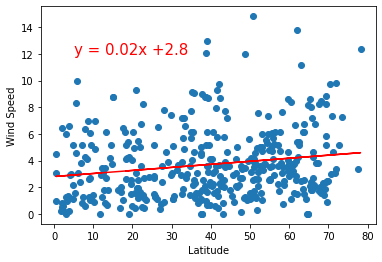

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

The r-value is: 0.06223904070051575


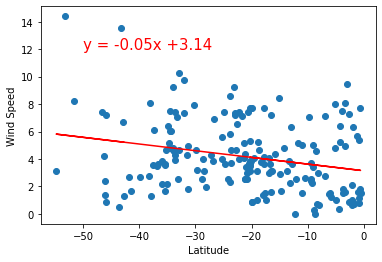

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** 

In the northwern hemisphere, there is a positive relationship with the cloudiness and latitude, which means the higher the latitude, the higher the wind speed.

In the southern hemisphere, there is a negative relationship with the cloudiness and latitude, which means the higher the latitude, the lower the wind speed.